In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.tsa.seasonal import seasonal_decompose

from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

from utils import get_data, train_val_test_split

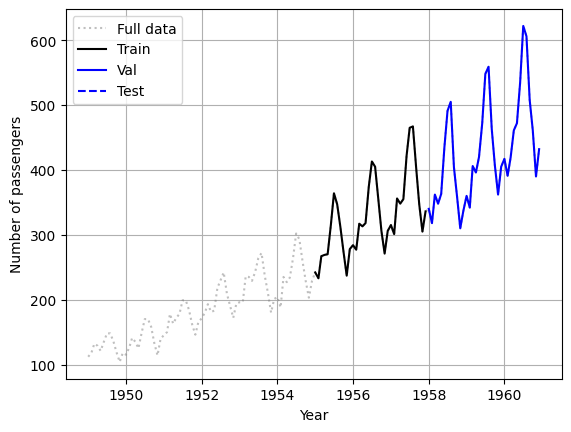

In [25]:
df = get_data()
train, val, test = train_val_test_split(df, [1955, 1958, 1965])

plt.xlabel('Year')
plt.ylabel('Number of passengers')

plt.plot(df, color='gray', alpha=0.5, linestyle='dotted', label='Full data')
plt.plot(train, color='k', label='Train')
plt.plot(val, color='b', label='Val')
plt.plot(test, color='b', linestyle='dashed', label='Test')

plt.grid()
plt.legend()
plt.show()

# (1) Moving Average (MA) model

The MA model consists of a rolling mean or rolling average of values to extract the trend from the dataset. We obtain a similar value to that of the trend in our naive model.

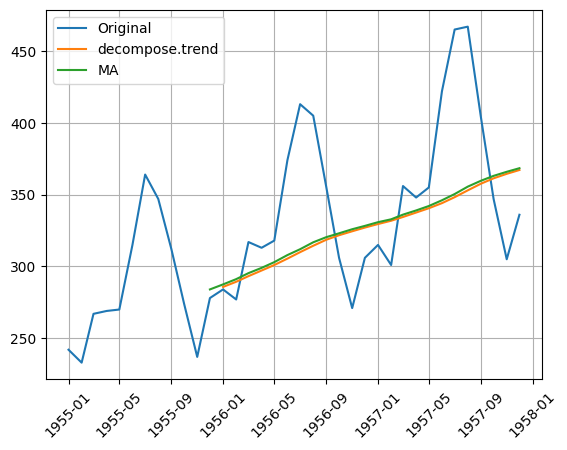

In [26]:
decompose = seasonal_decompose(train['#Passengers'], model='additive', period=12, two_sided=False)

plt.plot(train, label='Original')
plt.plot(decompose.trend, label='decompose.trend')
plt.plot(train.rolling(12).mean(), label='MA')

plt.xticks(rotation=45)

plt.grid()
plt.legend()
plt.show()

# (2) Autoregressive (AR) model

In [42]:
ar_model_1 = AutoReg(train, lags=[12])
ar_model_2 = AutoReg(train, lags=[12], trend='t', seasonal=True, period=12)
ar_model_1 = ar_model_1.fit()
ar_model_2 = ar_model_2.fit()
ar_pred_1 = ar_model_1.predict(start=len(train), end=len(train) + len(val))
ar_pred_2 = ar_model_2.predict(start=len(train), end=len(train) + len(val))

c:\Users\lopezmel\Documents\programming\python\air_passengers\.venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\lopezmel\Documents\programming\python\air_passengers\.venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\lopezmel\Documents\programming\python\air_passengers\.venv\lib\site-packages\statsmodels\tsa\deterministic.py:307: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)
c:\Users\lopezmel\Documents\programming\python\air_passengers\.venv\lib\site-packages\statsmodels\tsa\de

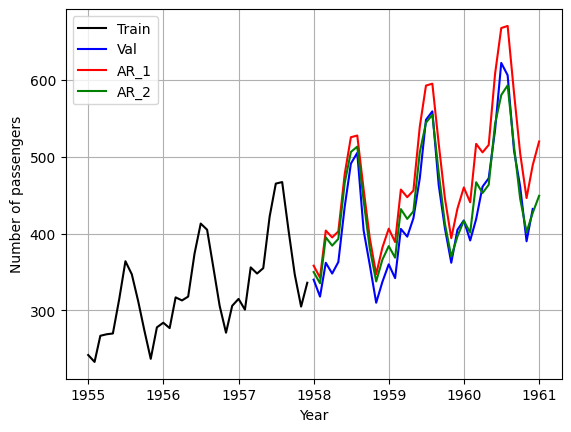

In [43]:
plt.xlabel('Year')
plt.ylabel('Number of passengers')

plt.plot(train, color='k', label='Train')
plt.plot(val, color='b', label='Val')
plt.plot(ar_pred_1, color='r', label='AR_1')
plt.plot(ar_pred_2, color='g', label='AR_2')

plt.grid()
plt.legend()
plt.show()

# (3) ARMA model

In [47]:
arma_model = ARIMA(train, order=(12, 0, 1))
arma_model = arma_model.fit()
arma_pred = arma_model.predict(
    start=len(train),
    end=len(train) + len(val), 
    typ='levels'
)

c:\Users\lopezmel\Documents\programming\python\air_passengers\.venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\lopezmel\Documents\programming\python\air_passengers\.venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\lopezmel\Documents\programming\python\air_passengers\.venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\lopezmel\Documents\programming\python\air_passengers\.venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-statio

# (4) ARIMA model

In [52]:
arima_model = ARIMA(train, order=(12, 1, 1))
arima_model = arima_model.fit()
arima_pred = arima_model.predict(
    start=len(train),
    end=len(train) + len(val), 
    typ='levels'
)

c:\Users\lopezmel\Documents\programming\python\air_passengers\.venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\lopezmel\Documents\programming\python\air_passengers\.venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\lopezmel\Documents\programming\python\air_passengers\.venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\lopezmel\Documents\programming\python\air_passengers\.venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-statio

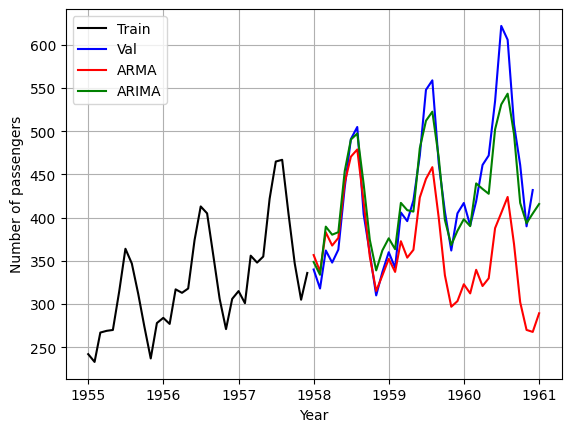

In [53]:
plt.xlabel('Year')
plt.ylabel('Number of passengers')

plt.plot(train, color='k', label='Train')
plt.plot(val, color='b', label='Val')
plt.plot(arma_pred, color='r', label='ARMA')
plt.plot(arima_pred, color='g', label='ARIMA')

plt.grid()
plt.legend()
plt.show()

In [54]:
from pmdarima.arima import auto_arima
    
auto_arima(y=train,
           seasonal=True, 
           m=12,
           trace=True
)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=inf, Time=0.52 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=182.472, Time=0.01 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=166.337, Time=0.18 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=0.20 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=251.057, Time=0.01 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=171.817, Time=0.02 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=inf, Time=0.61 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=0.18 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=inf, Time=0.21 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=0.68 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=180.436, Time=0.14 sec
 ARIMA(2,0,0)(1,1,0)[12] intercept   : AIC=168.328, Time=0.30 sec
 ARIMA(1,0,1)(1,1,0)[12] intercept   : AIC=168.331, Time=0.27 sec
 ARIMA(0,0,1)(1,1,0)[12] intercept   : AIC=171.987, Time=0.23 sec
 ARIMA(2,0,1)(1,1,0)[12] intercept   : AIC=inf, Time=1.05

ARIMA(order=(1, 0, 0), scoring_args={}, seasonal_order=(1, 1, 0, 12),
      suppress_warnings=True)

In [55]:
arima_model = ARIMA(train, order=(1, 0, 0), seasonal_order=(1, 1, 0, 12))
arima_model = arima_model.fit()
arima_pred = arima_model.predict(
    start=len(train),
    end=len(train) + len(val), 
    typ='levels'
)
arima_model.aic

c:\Users\lopezmel\Documents\programming\python\air_passengers\.venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\lopezmel\Documents\programming\python\air_passengers\.venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\lopezmel\Documents\programming\python\air_passengers\.venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\lopezmel\Documents\programming\python\air_passengers\.venv\lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError

170.232786973788